In [49]:
from ultralytics import SAM
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:


# Load a model
model = SAM("sam2_t.pt")

# Display model information (optional)
model.info()


Model summary: 422 layers, 38,945,986 parameters, 38,945,986 gradients

image 1/1 c:\Users\luana\OneDrive\Documentos\repositories\tcc\output_chunks\filled_chunks\chunk_400_2400.jpg: 1024x1024 1 0, 1 1, 1 2, 128409.8ms
Speed: 40.0ms preprocess, 128409.8ms inference, 8.0ms postprocess per image at shape (1, 3, 1024, 1024)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '0', 1: '1', 2: '2'}
 obb: None
 orig_img: array([[[ 64, 104,  93],
         [ 69, 104,  94],
         [ 23,  51,  45],
         ...,
         [133, 179, 173],
         [141, 178, 170],
         [147, 181, 171]],
 
        [[123, 162, 154],
         [ 92, 129, 121],
         [ 40,  71,  64],
         ...,
         [135, 176, 171],
         [137, 174, 166],
         [137, 172, 162]],
 
        [[ 41,  82,  75],
         [ 64, 105,  98],
         [ 57,  95,  89],
         ...,
         [ 76, 111, 107],
         [ 66, 104,  98],
         [147, 186, 178]],
 
        ...,
 
        [[119, 164, 167],
         [140, 181, 183],
         [136, 170, 169],
         ...,
         [128, 176, 182],
         [119, 171, 177],
         [144, 196, 202]],
 
        [[100, 147, 151],
         [147, 191, 192],
         [11

In [60]:

# Run inference
results = model("output_chunks/filled_chunks/chunk_0_2800.jpg")


image 1/1 c:\Users\luana\OneDrive\Documentos\repositories\tcc\output_chunks\filled_chunks\chunk_0_2800.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 139692.9ms
Speed: 43.0ms preprocess, 139692.9ms inference, 17.0ms postprocess per image at shape (1, 3, 1024, 1024)


In [61]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7'}
obb: None
orig_img: array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [116, 140, 152],
        [137, 179, 191],
        [120, 170, 182]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [166, 197, 206],
        [160, 203, 212],
        [154, 203, 213]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [149, 191, 196],
        [148, 192, 199],
        [155, 199, 206]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0, 

In [68]:
image = cv2.imread("output_chunks/filled_chunks/chunk_0_2800.jpg")

In [69]:
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [82]:
num_masks=sum(len(result.masks.data) for result in results)
grid_size=int(np.ceil(np.sqrt(num_masks)))

In [ ]:
fig,axes=plt.subplots(grid_size, grid_size, figsize=(15,15))
axes=axes.flatten()
idx=0

In [96]:
for result in results:
    for masks in result.masks:
        for mask in masks:
            mask = mask.data.transpose(0, 1).transpose(1, 2).numpy().astype(bool)
            colored_mask = np.zeros_like(image_rgb)
            colored_mask[mask.squeeze()] = (255, 0, 0)
            # print(colored_mask)
            image_rgb = cv2.addWeighted(image_rgb, 1, colored_mask, 0.3, 0)
            axes[idx].imshow(colored_mask)
            axes[idx].axis('off')
            axes[idx].set_title(f"Mask {idx + 1}")
            idx+=1



In [97]:
for i in range(idx,len(axes)):
    axes[i].axis('off')

In [98]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

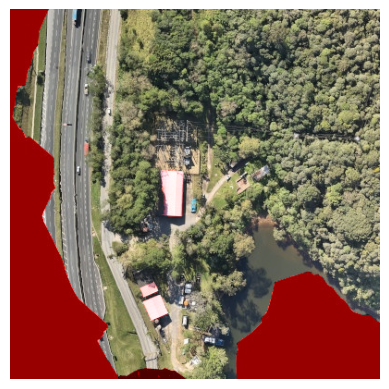

In [79]:
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
type(results[0].masks)

ultralytics.engine.results.Masks

In [ ]:
image_rgb.shape

(400, 400, 3)